In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shopping_behavior_updated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Calculate LTV based on customer category, to find the most valuable Target Segment

1. Data cleaning: no null values, extreme values (outliers) or duplicates. Data set is ready for analysis.

In [2]:
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


2. Customer visualisation.
2.1 Age - approximately normal distribution, mean 45.
2.2 Gender 68% vs 32% Male/Female
2.3 Location can be modelled as uniformly distributred with 2% at each state

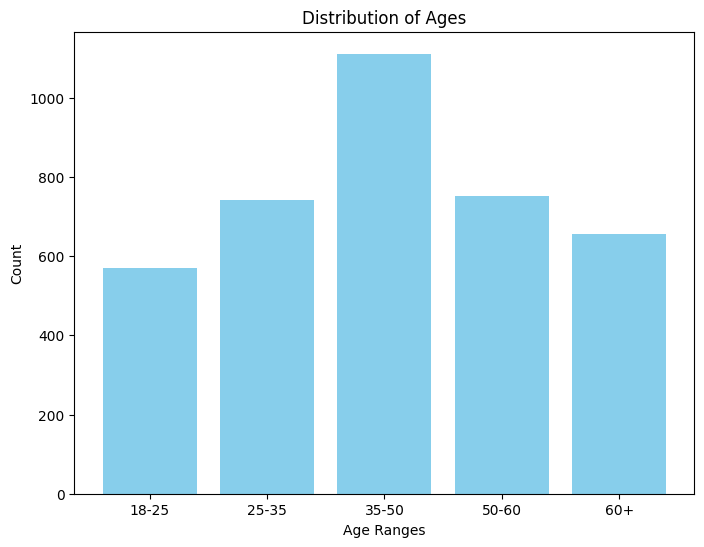

In [3]:

# Define age ranges
age_ranges = {
    '18-25': range(18, 26),
    '25-35': range(26, 36),
    '35-50': range(36, 51),
    '50-60': range(51, 61),
    '60+': range(61, 70)
}

# Count individuals in each age range
age_counts = {age_range: df[df['Age'].isin(age_ranges[age_range])]['Age'].count() for age_range in age_ranges}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(age_counts.keys(), age_counts.values(), color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.show()


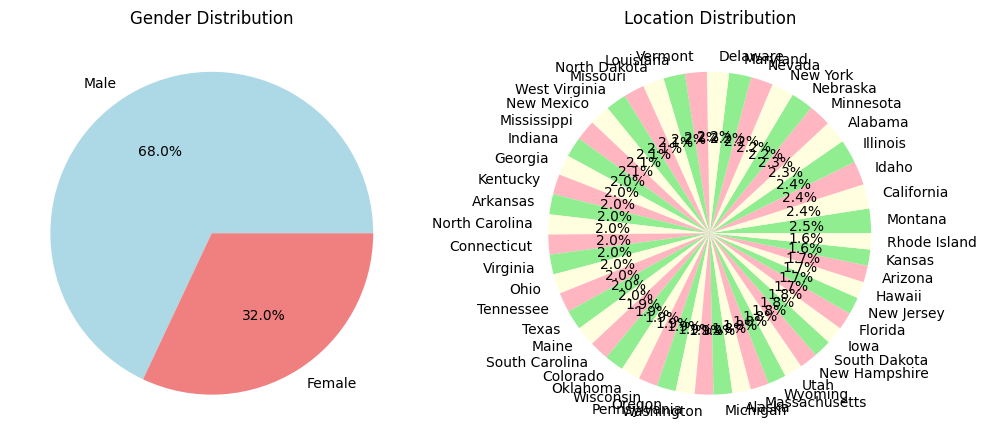

In [4]:
gender_counts = df['Gender'].value_counts()
location_counts = df['Location'].value_counts()

# Plotting Gender pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')

# Plotting Location pie chart
plt.subplot(1, 2, 2)
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow', 'lightpink'])
plt.title('Location Distribution')

plt.tight_layout()
plt.show()

3.Divide into most typical target segments
10 subgroups by age and gender. Analyse if the groups show monotonous spending habits.

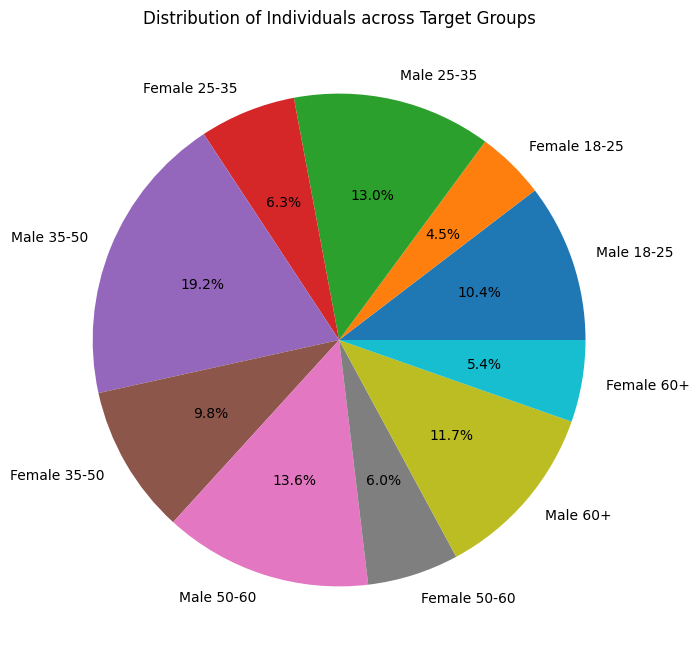

In [5]:

# Define target groups combining age ranges and gender
target_groups = {
    'Male 18-25': df[(df['Gender'] == 'Male') & (df['Age'].isin(age_ranges['18-25']))],
    'Female 18-25': df[(df['Gender'] == 'Female') & (df['Age'].isin(age_ranges['18-25']))],
    'Male 25-35': df[(df['Gender'] == 'Male') & (df['Age'].isin(age_ranges['25-35']))],
    'Female 25-35': df[(df['Gender'] == 'Female') & (df['Age'].isin(age_ranges['25-35']))],
    'Male 35-50': df[(df['Gender'] == 'Male') & (df['Age'].isin(age_ranges['35-50']))],
    'Female 35-50': df[(df['Gender'] == 'Female') & (df['Age'].isin(age_ranges['35-50']))],
    'Male 50-60': df[(df['Gender'] == 'Male') & (df['Age'].isin(age_ranges['50-60']))],
    'Female 50-60': df[(df['Gender'] == 'Female') & (df['Age'].isin(age_ranges['50-60']))],
    'Male 60+': df[(df['Gender'] == 'Male') & (df['Age'].isin(age_ranges['60+']))],
    'Female 60+': df[(df['Gender'] == 'Female') & (df['Age'].isin(age_ranges['60+']))]
}

# Count individuals in each target group
group_counts = {group: len(data) for group, data in target_groups.items()}

# Plotting pie chart for target groups
plt.figure(figsize=(8, 8))
plt.pie(group_counts.values(), labels=group_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Individuals across Target Groups')
plt.show()

Mean stats for every group on spendings and reviews

<Figure size 1200x800 with 0 Axes>

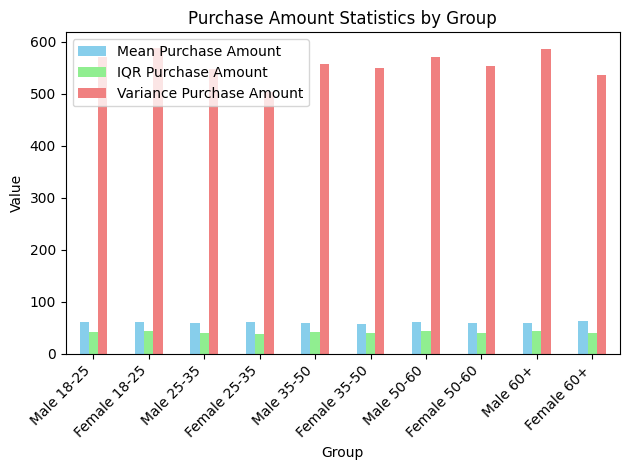

In [6]:
# Calculate mean, variance, and IQR for each group
group_stats = {}
for group, data in target_groups.items():
    group_stats[group] = {
        'Mean Purchase Amount': np.mean(data['Purchase Amount (USD)']),
        'Variance Purchase Amount': np.var(data['Purchase Amount (USD)']),
        'Mean Review Rating': np.mean(data['Review Rating']),
        'Variance Review Rating': np.var(data['Review Rating']),
        'IQR Purchase Amount': np.percentile(data['Purchase Amount (USD)'], 75) - np.percentile(data['Purchase Amount (USD)'], 25),
        'IQR Review Rating': np.percentile(data['Review Rating'], 75) - np.percentile(data['Review Rating'], 25)
    }

# Convert group_stats to DataFrame
stats_df = pd.DataFrame.from_dict(group_stats, orient='index')

# Plotting bar chart
plt.figure(figsize=(12, 8))
stats_df[['Mean Purchase Amount', 'IQR Purchase Amount', 'Variance Purchase Amount']].plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Purchase Amount Statistics by Group')
plt.xlabel('Group')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

(array([1, 2]),
 [Text(1, 0, 'Mean Review Rating'), Text(2, 0, 'IQR Review Rating')])

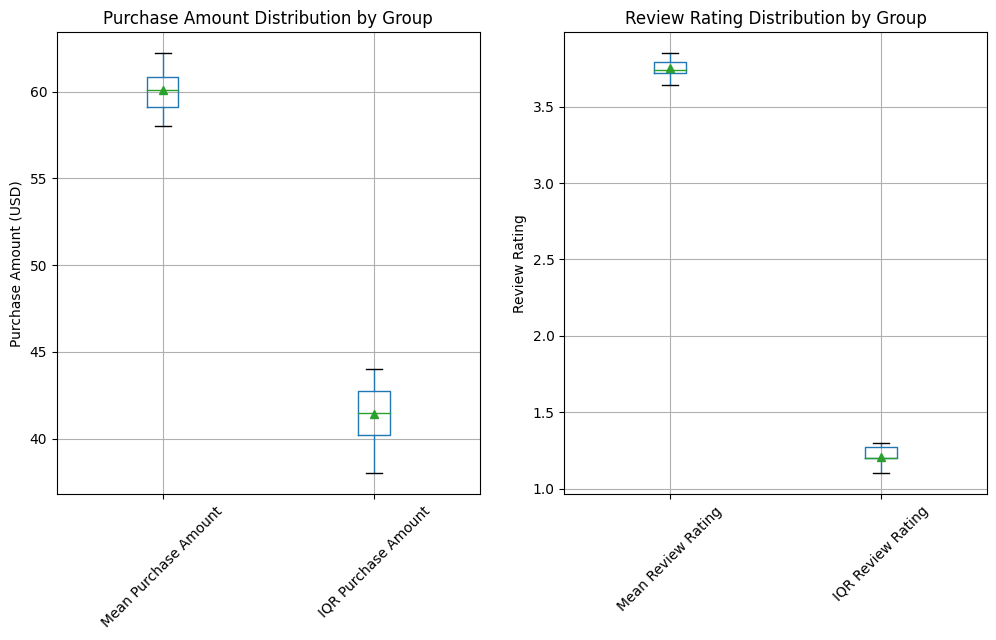

In [7]:
# Calculate mean, variance, and IQR for each group
group_stats = {}
for group, data in target_groups.items():
    group_stats[group] = {
        'Mean Purchase Amount': np.mean(data['Purchase Amount (USD)']),
        'Variance Purchase Amount': np.var(data['Purchase Amount (USD)']),
        'Mean Review Rating': np.mean(data['Review Rating']),
        'Variance Review Rating': np.var(data['Review Rating']),
        'IQR Purchase Amount': np.percentile(data['Purchase Amount (USD)'], 75) - np.percentile(data['Purchase Amount (USD)'], 25),
        'IQR Review Rating': np.percentile(data['Review Rating'], 75) - np.percentile(data['Review Rating'], 25)
    }

# Convert group_stats to DataFrame
stats_df = pd.DataFrame.from_dict(group_stats, orient='index')

# Plotting box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bp1 = stats_df[['Mean Purchase Amount', 'IQR Purchase Amount']].boxplot(showmeans=True, showfliers=False)
plt.title('Purchase Amount Distribution by Group')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
bp2 = stats_df[['Mean Review Rating', 'IQR Review Rating']].boxplot(showmeans=True, showfliers=False)
plt.title('Review Rating Distribution by Group')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)



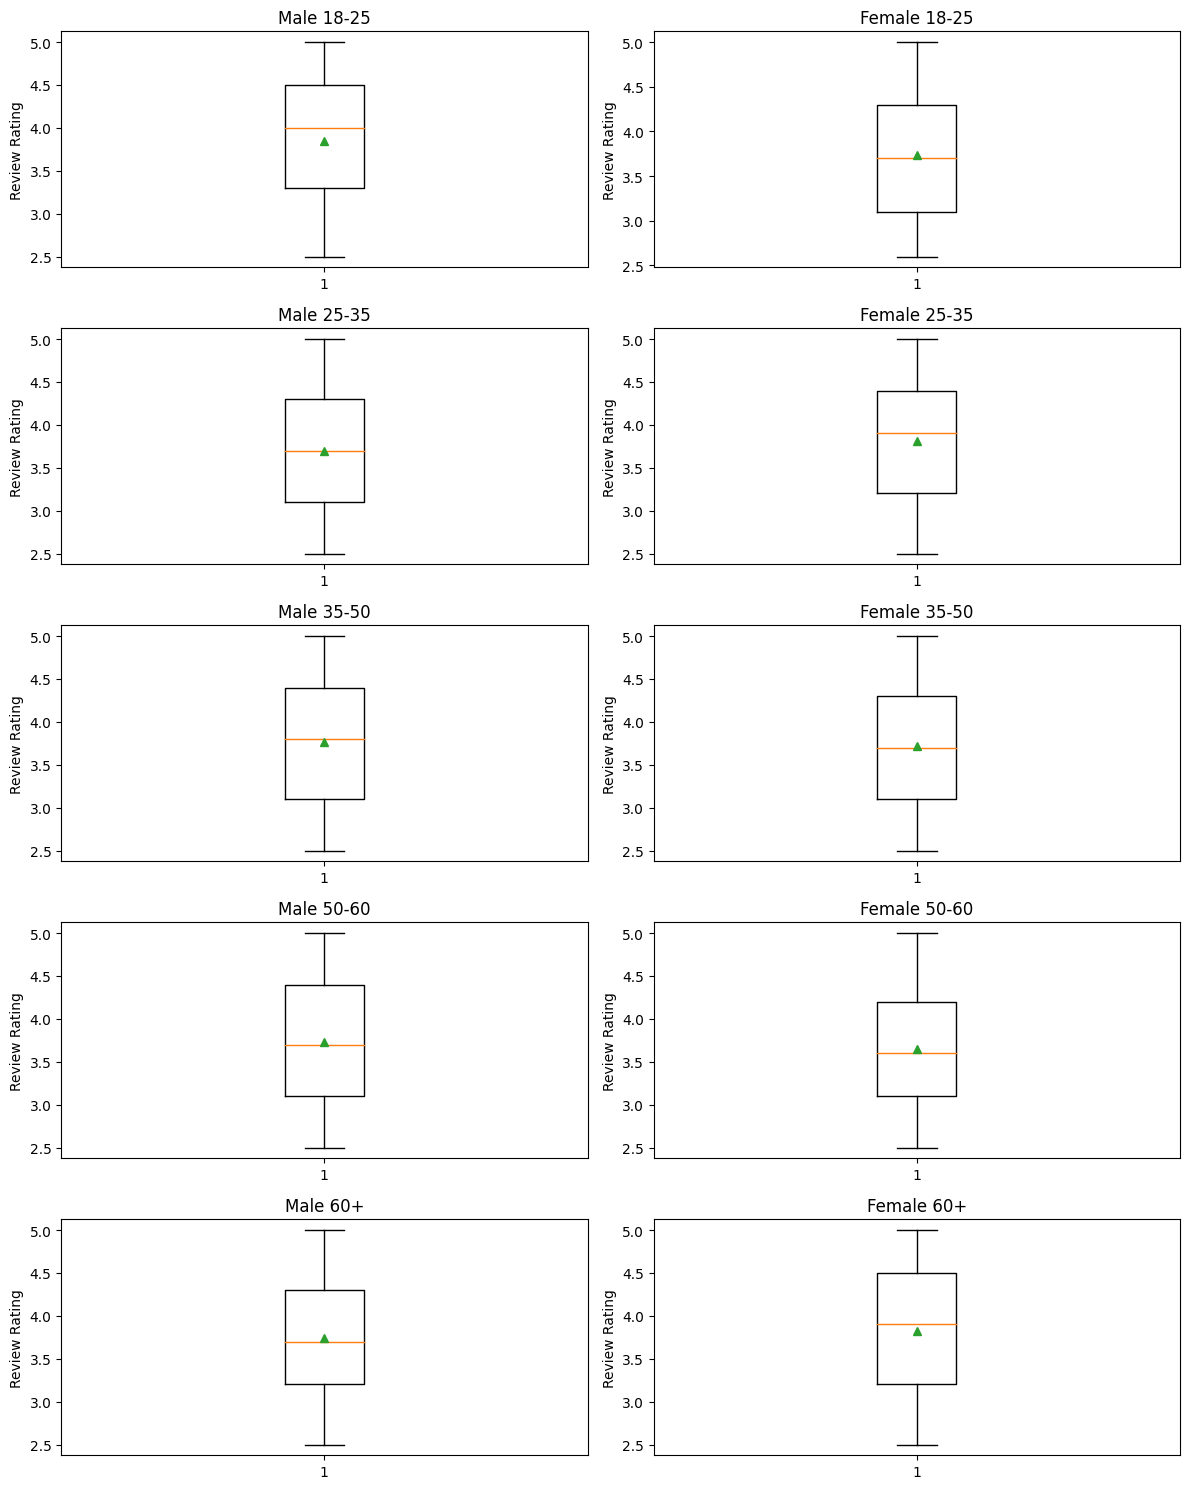

In [8]:
# Plot box plots Review
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.ravel()
for i, (group, data) in enumerate(target_groups.items()):
    axs[i].boxplot(data['Review Rating'], showmeans=True)
    axs[i].set_title(group)
    axs[i].set_ylabel('Review Rating')
plt.tight_layout()
plt.show()

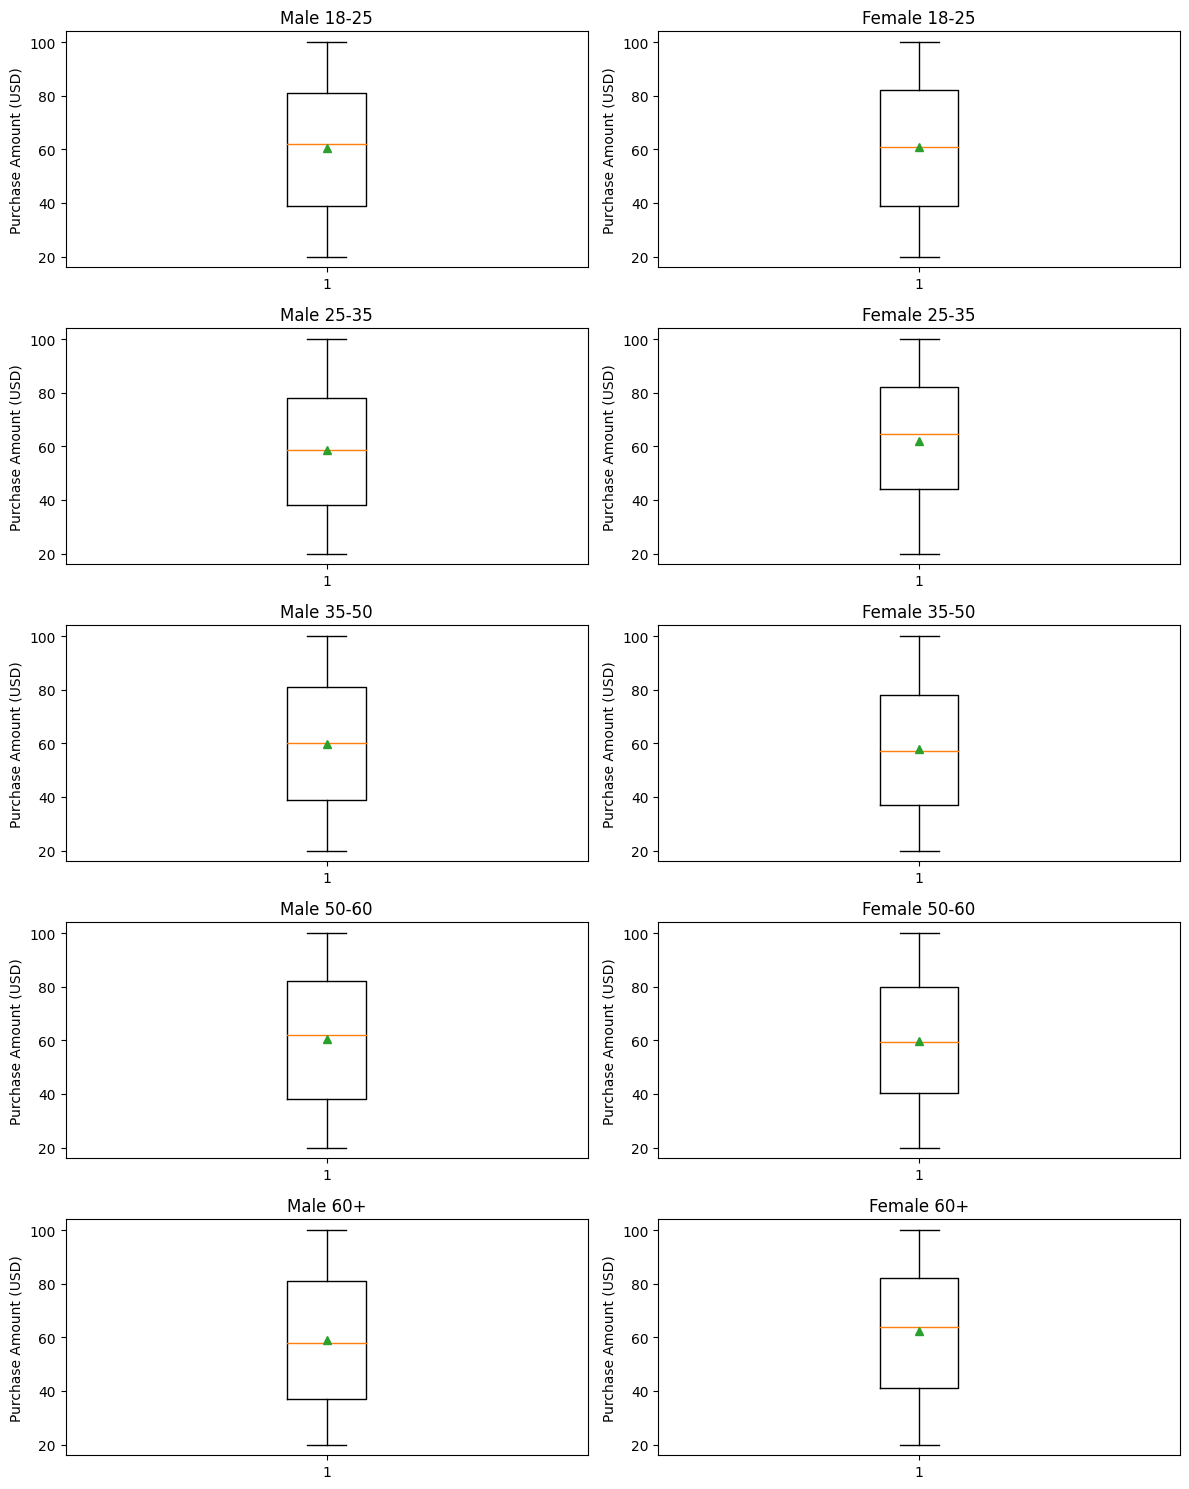

In [9]:
# Plot box plots Purchase Amount
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.ravel()
for i, (group, data) in enumerate(target_groups.items()):
    axs[i].boxplot(data['Purchase Amount (USD)'], showmeans=True)
    axs[i].set_title(group)
    axs[i].set_ylabel('Purchase Amount (USD)')
plt.tight_layout()
plt.show()

All groups perfrom visually similarly, so let's run t-tests at 10% significance level

In [10]:
from scipy.stats import ttest_ind

# List to store t-test results
t_test_results = []

# Perform t-tests between each pair of groups
for i in range(len(stats_df)):
    for j in range(i+1, len(stats_df)):
        group1_name = stats_df.index[i]
        group2_name = stats_df.index[j]
        group1_data = target_groups[group1_name]['Purchase Amount (USD)']
        group2_data = target_groups[group2_name]['Purchase Amount (USD)']
        t_statistic, p_value = ttest_ind(group1_data, group2_data)
        # Determine if the difference is significant at 10% significance level
        significant = p_value <= 0.1
        t_test_results.append({
            'Group 1': group1_name,
            'Group 2': group2_name,
            'T-statistic': t_statistic,
            'P-value': p_value,
            'Significant at 10%': significant
        })

# Display t-test results
t_test_df = pd.DataFrame(t_test_results)
print(t_test_df)

         Group 1       Group 2  T-statistic   P-value  Significant at 10%
0     Male 18-25  Female 18-25    -0.166136  0.868109               False
1     Male 18-25    Male 25-35     1.189737  0.234465               False
2     Male 18-25  Female 25-35    -0.798892  0.424650               False
3     Male 18-25    Male 35-50     0.623252  0.533245               False
4     Male 18-25  Female 35-50     1.484525  0.138078               False
5     Male 18-25    Male 50-60     0.128812  0.897534               False
6     Male 18-25  Female 50-60     0.356329  0.721714               False
7     Male 18-25      Male 60+     0.940813  0.347069               False
8     Male 18-25    Female 60+    -0.819389  0.412889               False
9   Female 18-25    Male 25-35     1.079818  0.280611               False
10  Female 18-25  Female 25-35    -0.500476  0.617006               False
11  Female 18-25    Male 35-50     0.639614  0.522585               False
12  Female 18-25  Female 35-50     1.3

At 10% significant difference in spending behaviour of
1.  Male 25-35  Female 25-35
2.  Male 25-35    Female 60+
3.  Female 25-35  Female 35-50
4.  Female 35-50    Female 60+
So we can conclude that Male 25-35 category has specific spending behaviour and that in females spending behaviour changes based on age

In [11]:
from scipy.stats import ttest_ind

# List to store t-test results
t_test_results = []

# Perform t-tests between each pair of groups
for i in range(len(stats_df)):
    for j in range(i+1, len(stats_df)):
        group1_name = stats_df.index[i]
        group2_name = stats_df.index[j]
        group1_data = target_groups[group1_name]['Purchase Amount (USD)']
        group2_data = target_groups[group2_name]['Purchase Amount (USD)']
        t_statistic, p_value = ttest_ind(group1_data, group2_data)
        # Determine if the difference is significant at 15% significance level
        significant = p_value <= 0.15
        t_test_results.append({
            'Group 1': group1_name,
            'Group 2': group2_name,
            'T-statistic': t_statistic,
            'P-value': p_value,
            'Significant at 15%': significant
        })

# Display t-test results
t_test_df = pd.DataFrame(t_test_results)
print(t_test_df)

         Group 1       Group 2  T-statistic   P-value  Significant at 15%
0     Male 18-25  Female 18-25    -0.166136  0.868109               False
1     Male 18-25    Male 25-35     1.189737  0.234465               False
2     Male 18-25  Female 25-35    -0.798892  0.424650               False
3     Male 18-25    Male 35-50     0.623252  0.533245               False
4     Male 18-25  Female 35-50     1.484525  0.138078                True
5     Male 18-25    Male 50-60     0.128812  0.897534               False
6     Male 18-25  Female 50-60     0.356329  0.721714               False
7     Male 18-25      Male 60+     0.940813  0.347069               False
8     Male 18-25    Female 60+    -0.819389  0.412889               False
9   Female 18-25    Male 25-35     1.079818  0.280611               False
10  Female 18-25  Female 25-35    -0.500476  0.617006               False
11  Female 18-25    Male 35-50     0.639614  0.522585               False
12  Female 18-25  Female 35-50     1.3

In [12]:
from scipy.stats import ttest_ind

# List to store t-test results
t_test_results = []

# Perform t-tests between each pair of groups
for i in range(len(stats_df)):
    for j in range(i+1, len(stats_df)):
        group1_name = stats_df.index[i]
        group2_name = stats_df.index[j]
        group1_data = target_groups[group1_name]['Review Rating']
        group2_data = target_groups[group2_name]['Review Rating']
        t_statistic, p_value = ttest_ind(group1_data, group2_data)
        # Determine if the difference is significant at 10% significance level
        significant = p_value <= 0.1
        t_test_results.append({
            'Group 1': group1_name,
            'Group 2': group2_name,
            'T-statistic': t_statistic,
            'P-value': p_value,
            'Significant at 10%': significant
        })

# Display t-test results
t_test_df = pd.DataFrame(t_test_results)
print(t_test_df)
# Filter the DataFrame to only include rows where "Significant at 10%" is True
significant_at_10_percent = t_test_df[t_test_df['Significant at 10%'] == True]

# Print the filtered DataFrame
print(significant_at_10_percent)

         Group 1       Group 2  T-statistic   P-value  Significant at 10%
0     Male 18-25  Female 18-25     1.677612  0.093972                True
1     Male 18-25    Male 25-35     3.135931  0.001769                True
2     Male 18-25  Female 25-35     0.727665  0.467086               False
3     Male 18-25    Male 35-50     1.970736  0.048997                True
4     Male 18-25  Female 35-50     2.458380  0.014175                True
5     Male 18-25    Male 50-60     2.467513  0.013787                True
6     Male 18-25  Female 50-60     3.492376  0.000512                True
7     Male 18-25      Male 60+     2.296296  0.021903                True
8     Male 18-25    Female 60+     0.383034  0.701830               False
9   Female 18-25    Male 25-35     0.625886  0.531602               False
10  Female 18-25  Female 25-35    -0.945132  0.345144               False
11  Female 18-25    Male 35-50    -0.366243  0.714269               False
12  Female 18-25  Female 35-50     0.2

Males 18-25 and Females 50-60 in general have distinct review ratings

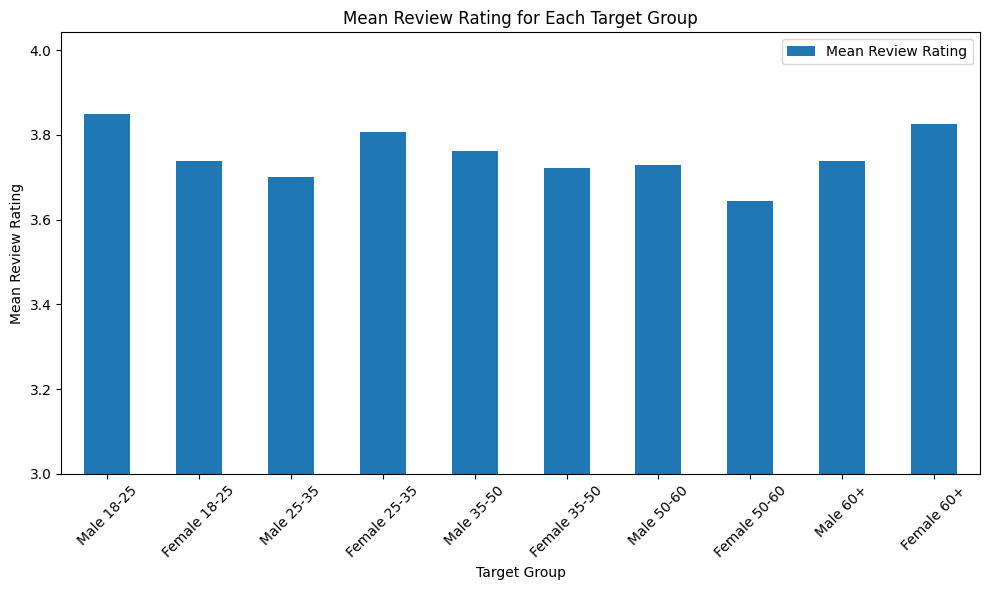

In [13]:
# Calculate the mean Review Rating for each target group
mean_review_rating_by_target_group = {}
for group, data in target_groups.items():
    mean_review_rating_by_target_group[group] = data['Review Rating'].mean()

# Convert the dictionary to a DataFrame
mean_review_rating_df = pd.DataFrame.from_dict(mean_review_rating_by_target_group, orient='index', columns=['Mean Review Rating'])

# Plot the results
mean_review_rating_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Target Group')
plt.ylabel('Mean Review Rating')
plt.title('Mean Review Rating for Each Target Group')
plt.xticks(rotation=45)
plt.ylim(3, None)  # Set y-axis limits to start from 3
plt.tight_layout()
plt.show()

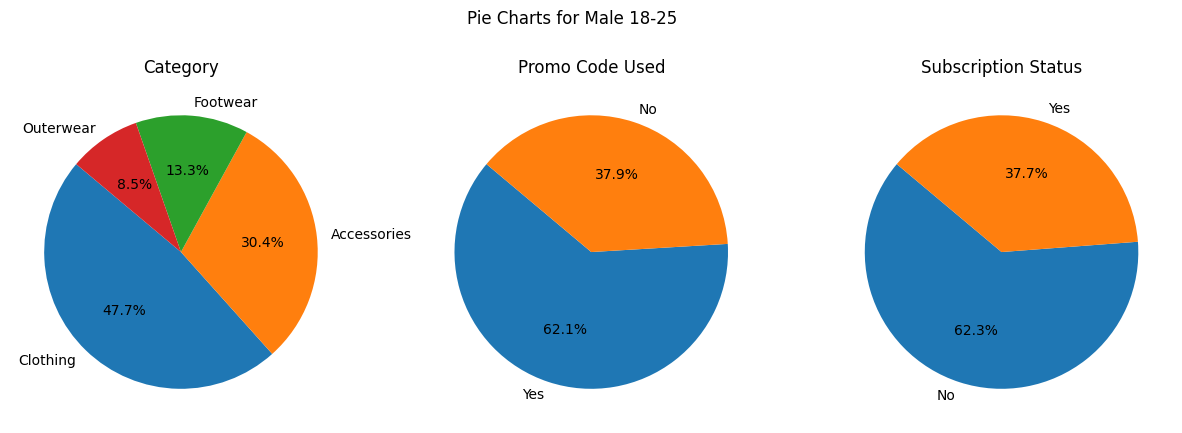

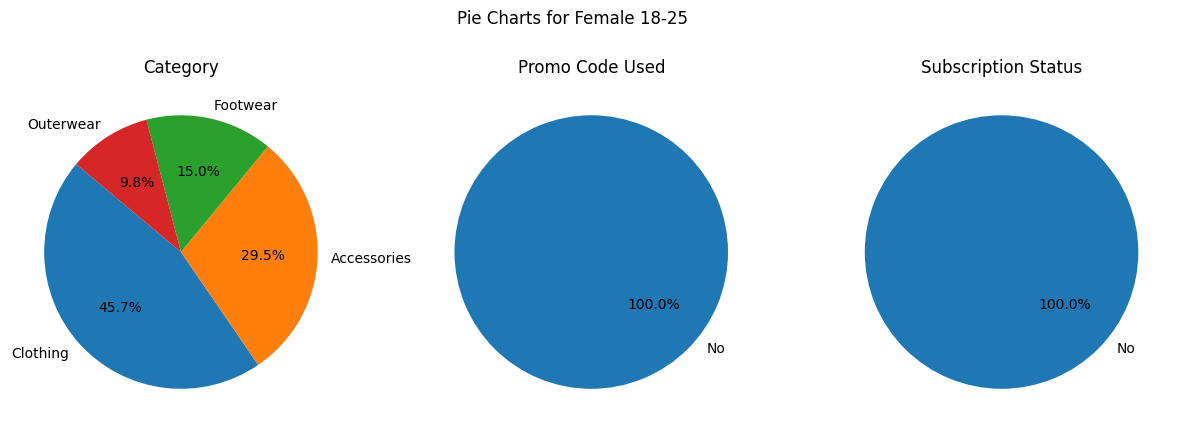

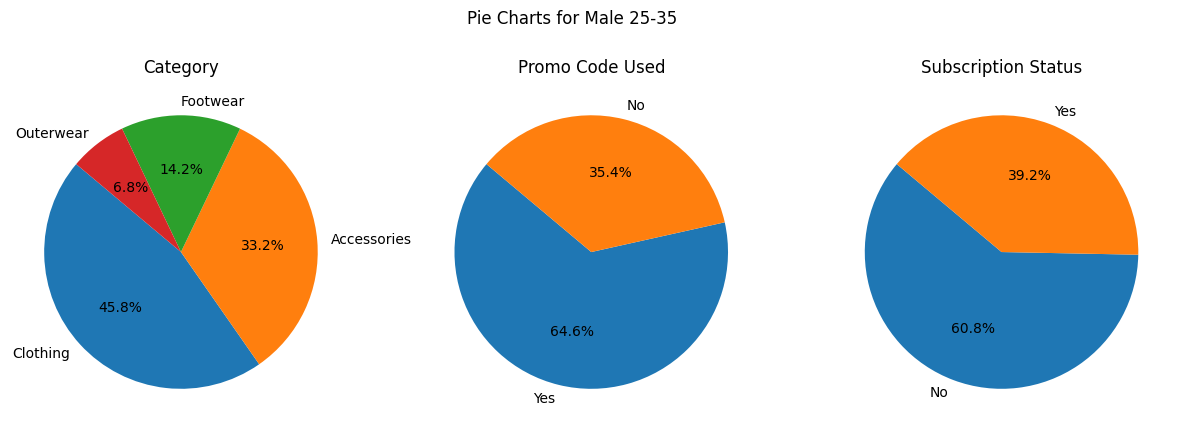

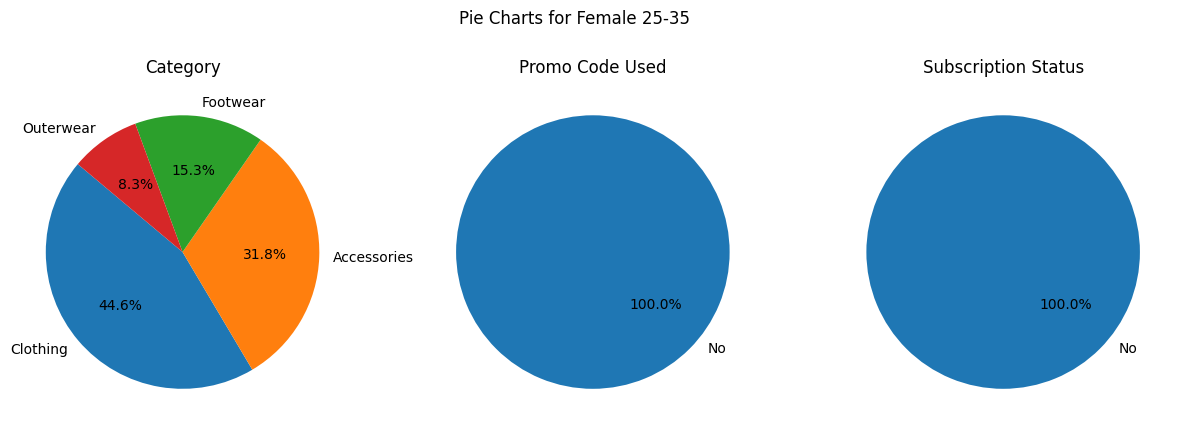

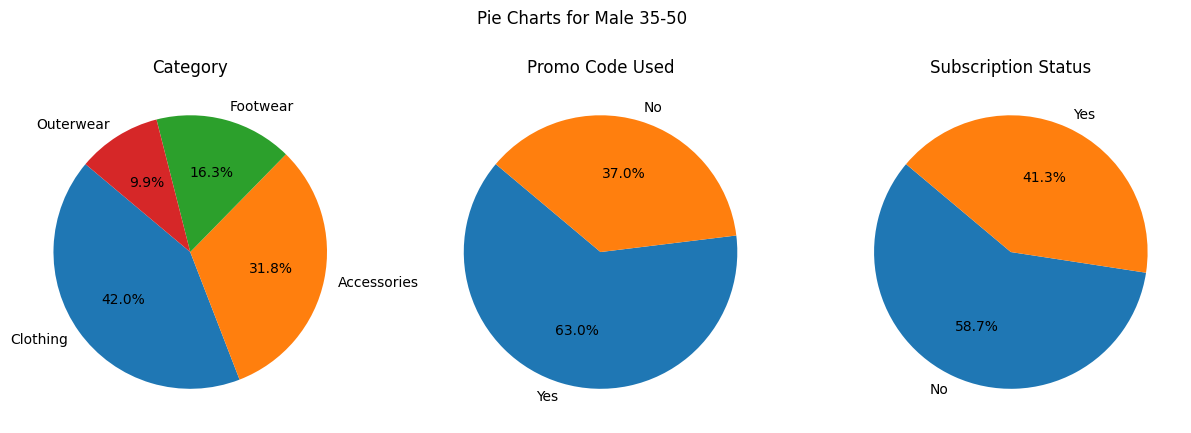

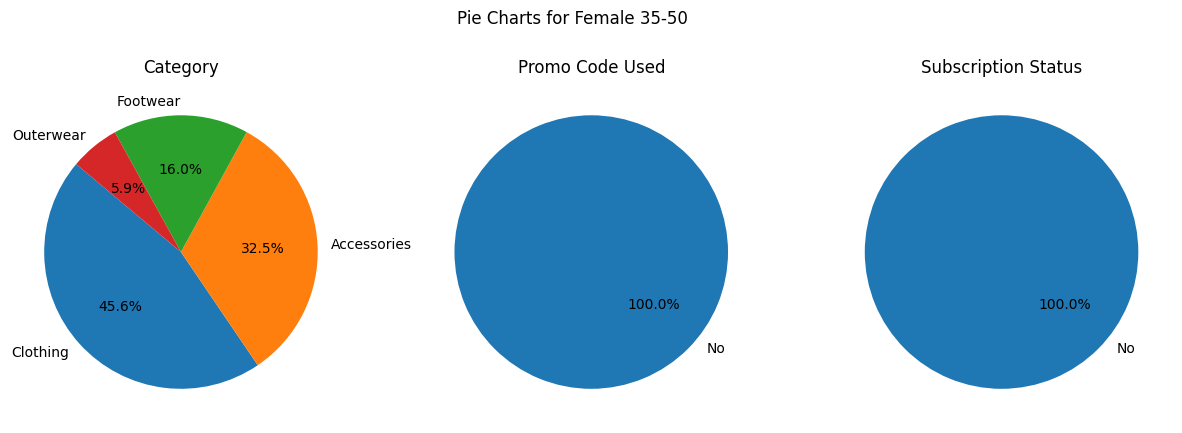

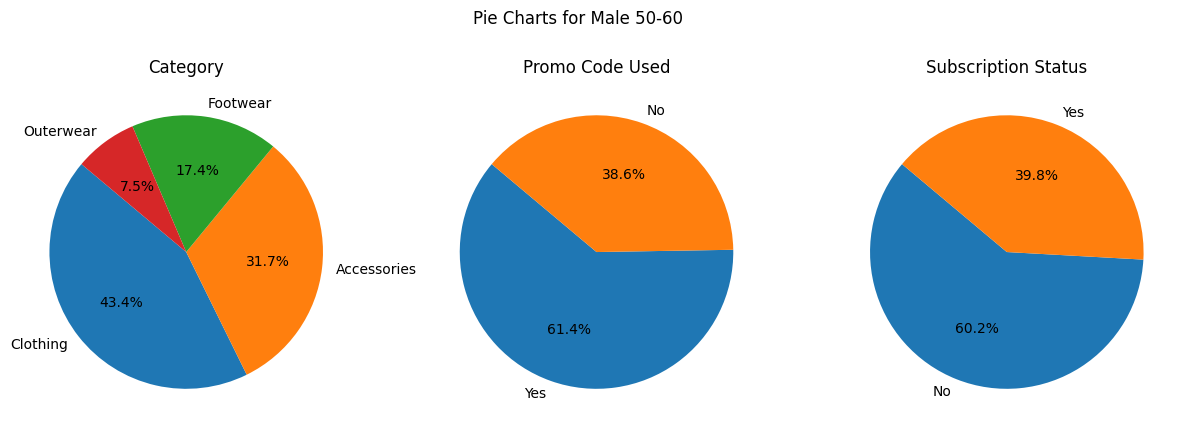

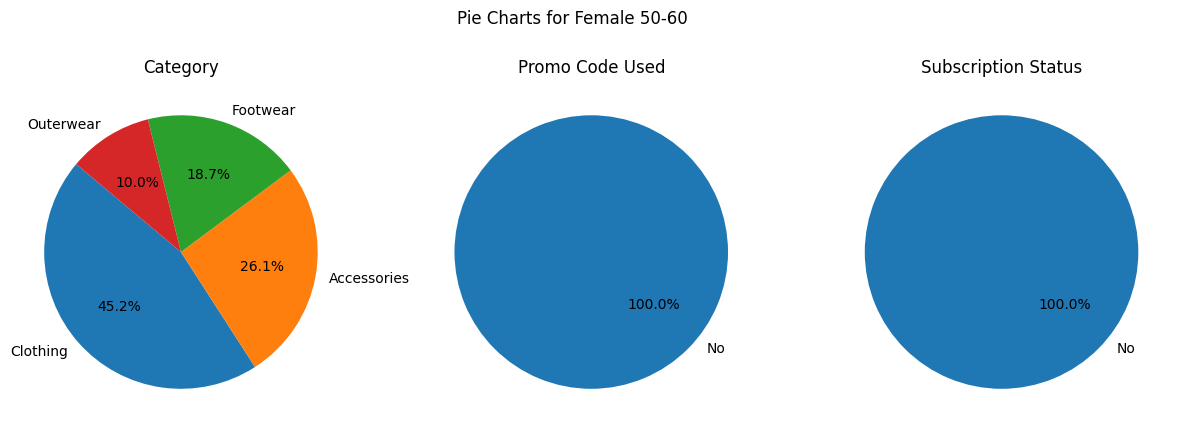

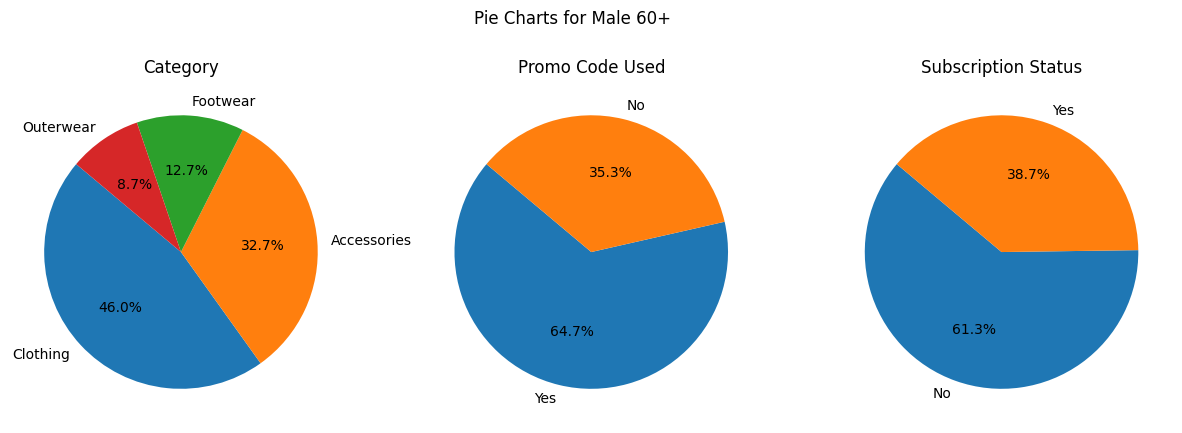

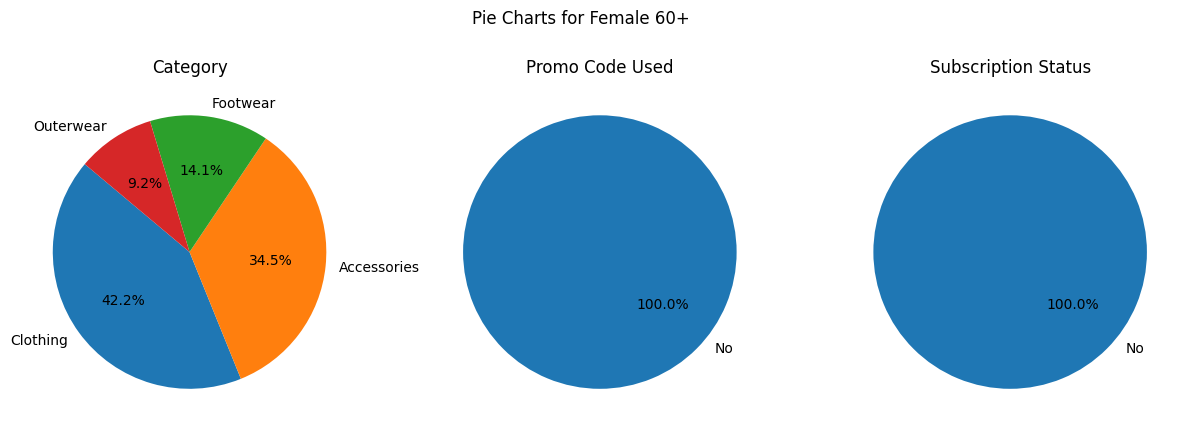

In [14]:

# Define the categories to plot
categories_to_plot = ['Category', 'Promo Code Used', 'Subscription Status']

# Iterate over the target groups and plot a pie chart for each group
for group, data in target_groups.items():
    # Create subplots for each category
    fig, axs = plt.subplots(1, len(categories_to_plot), figsize=(15, 5))
    fig.suptitle(f'Pie Charts for {group}')
    
    for i, category in enumerate(categories_to_plot):
        # Count the occurrences of each category
        category_counts = data[category].value_counts()
        
        # Plot a pie chart for the current category
        axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(category)

    plt.show()


Similarities in Categories, promo codes and subscription metrics and review ratings:
No subscription or promocode and lower review ratings are correlated.
No promo code -> low review rating -> low subscription.
1. Analyse if price affects review ratings.
2. Add susbcription into future CLV calculations
3. promo code = CAC, past purchases + subscription status = LTV

4.Calculate CLV of each segment
Use formula which can be applied to the data: average number of previous purchases and average sum spent.

In [15]:
# Define a function to calculate the specified formula
def calculate_formula(group):
    previous_purchases_avg = group['Previous Purchases'].mean()
    purchase_amount_avg = group['Purchase Amount (USD)'].mean()
    return (previous_purchases_avg + 1) * purchase_amount_avg

# Calculate the formula for each target group
formula_results = {}

for group, data in target_groups.items():
    formula_results[group] = calculate_formula(data)

# Convert the dictionary to a DataFrame for easier manipulation and visualization
formula_results_df = pd.DataFrame.from_dict(formula_results, orient='index', columns=['Formula Result'])
print(formula_results_df)

              Formula Result
Male 18-25       1582.954079
Female 18-25     1489.100204
Male 25-35       1503.566148
Female 25-35     1614.380934
Male 35-50       1574.095386
Female 35-50     1444.343737
Male 50-60       1664.397969
Female 50-60     1628.546692
Male 60+         1635.388247
Female 60+       1622.736262


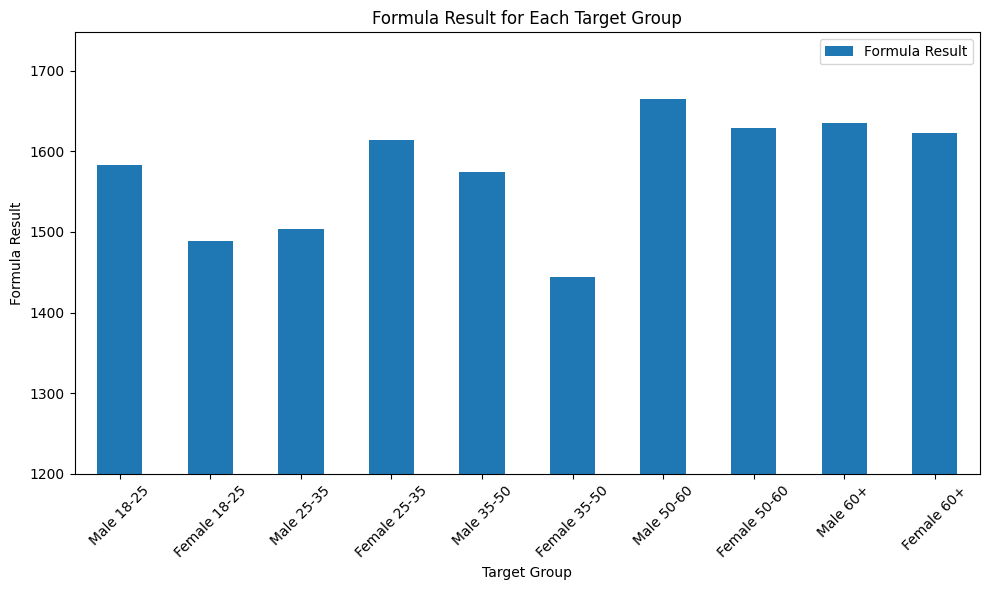

In [16]:
# Plot the results
formula_results_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Target Group')
plt.ylabel('Formula Result')
plt.title('Formula Result for Each Target Group')
plt.xticks(rotation=45)
plt.ylim(1200,None)
plt.tight_layout()
plt.show()

Conclusions:
1. Customers 50+ are the most valuable, should leverage younger people more
2. Males are the only ones who used promo code and thus formed subscriptions, the ad only worked on males